# Spam classsification

In [32]:
import pandas as pd
import re
from nltk.corpus import stopwords
import numpy as np
%matplotlib inline
import sys  
from sklearn.feature_extraction.text import CountVectorizer
reload(sys)  
sys.setdefaultencoding('utf8')

In [17]:
tweets = pd.read_csv("tweets.csv",header=0)

In [18]:
tweets.head()

,id,tweet,spam
0,1,via @pmpg65: @trafficLARA @PJGZLEZ la locura ...,0
1,2,via @SotoKv: @photojcg al parecer fuegos arti...,0
2,3,via @PJGZLEZ: ellos se comen una torta de mas ...,0
3,4,via @SobrePC: bomba artificiales en el core 3...,0
4,5,via @econ\\_carlos: Muerto no cumple años la v...,0


### Ham vs Spam

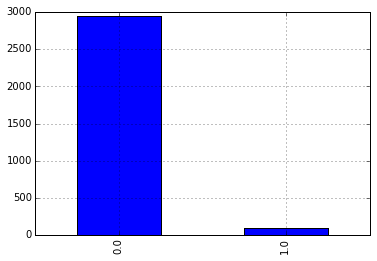

In [25]:
tweets.spam.value_counts().plot(kind = "bar")

# Text processing

In [35]:
def only_text(text):
    return re.sub("[^a-zA-Z]|via|(http:\/\/\w+.+?\w+\/?\w+?)"," ",text)

In [36]:
def to_lower(text):
    return text.lower()

In [37]:
def remove_stop_words(text):
    return [w for w in text.split() if w not in stopwords.words('spanish')]

In [38]:
tweets['tweet'] = tweets['tweet'].apply(only_text)

In [39]:
tweets['tweet'] = tweets['tweet'].apply(to_lower)

# Word counts

In [47]:
vectorizer = CountVectorizer(min_df=2,max_features = 500)
X = vectorizer.fit_transform(tweets['tweet'])

In [53]:
words = pd.DataFrame(X.A, columns=vectorizer.get_feature_names())

In [68]:
words.groupby(vectorizer.get_feature_names()).size()

aba  abuso  accidente  actual  acuerdo  adivinar  ado  adrianotorococo  aeggatite  aereometeo  agua  aguiarj  aguiladevzla  ahora  aimararamirez  aires  ajrdec  al  alanhdez  alc  ales  alexamaria  algo  alguien  alli  alumbrado  am  amigo  amigosdlibertad  amuliat  an  ana  angelecardenas  antes  antoniopcv  apensar  aqu  aqui  as  aun  av  aviso  ay  ayer  ayuda  bachaqueo  bachaqueros  banco  bancos  bd  belkisarellano  bella  bervillasmil  bien  blico  bo  bs  buche  buen  buenas  bueno  busmetromara  ca  cabimas  cada  calle  cambio  canal  cantv  caracas  carlos  carro  carros  casa  casi  cauchos  centro  cerca  cerrado  chapo  chepina  chimpanch  choque  cierto  cinexve  ciudad  claro  cll  cmgarciay  cnncreole  co  col  cola  colas  colegio  comer  comida  como  comprar  con  conciencia  conoehsumadre  conseguir  contactocantv  coromotofereira  corpoeleczulia  corronchita  cosa  creo  cualquier  cuando  cvfg  da  dame  dan  de  debblibre  decir  del  delicias  depender  desde 